Movie Data Analysis

Overview

The aim is to explore the data and reveal patterns and relationships that may be useful for decision making. The technique to analyze the data will be visualization. The insights created from this project will be used to inform decisions and plans in order to improve Microsoft's performance.

Business Problem

Through this analysis, Microsoft can understand consumer preferences in terms of movie genres and ratings, develop movoe reccomendations for consumers based on ratings and finally identify successful movies and genres.


Data Understanding

Microsoft has the longest running public dataset of movies in the world. Movies are associated with their movie basics and movie ratings data. The data files provide the genres, runtime minutes, average ratings and etc.

Data Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [6]:
pd.read_csv

<function pandas.io.parsers.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [7]:
pd.read_sql


<function pandas.io.sql.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize: Union[int, NoneType] = None) -> Union[pandas.core.frame.DataFrame, Iterator[pandas.core.frame.DataFrame]]>

Movie Basics and Movie Ratings Data

In [8]:
df1 = pd.read_sql("""SELECT* FROM movie_basics;""", conn)
df1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
df1 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Data Cleaning

I cleaned the data to remove null values and make the data more consistent and easier to understand.

In [10]:
df1.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
print('Percentage of Null genres Values:', len(df1[df1.genres.isna()]) / len(df1) )

Percentage of Null genres Values: 0.037004598204510616


In [12]:
df1 = df1.drop('genres', axis = 1)
df1.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
dtype: int64

In [13]:
df1.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
dtype: int64

In [14]:
print('Percentage of Null runtime_minutes Values:', len(df1[df1.runtime_minutes.isna()]) / len(df1) )

Percentage of Null runtime_minutes Values: 0.21717620976571053


In [15]:
df1 = df1.drop('runtime_minutes', axis = 1)
df1.isna().sum()

movie_id           0
primary_title      0
original_title    21
start_year         0
dtype: int64

In [16]:
df1.isna().sum()

movie_id           0
primary_title      0
original_title    21
start_year         0
dtype: int64

In [17]:
print('Percentage of Null original_title Values:', len(df1[df1.original_title.isna()]) / len(df1) )

Percentage of Null original_title Values: 0.00014369389095686446


In [18]:
df1 = df1.drop('original_title', axis = 1)
df1.isna().sum()

movie_id         0
primary_title    0
start_year       0
dtype: int64

In [19]:
df2 = pd.read_sql("""SELECT* FROM movie_ratings;""", conn)
df2.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
df2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [21]:
df2.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Analysis

Movie Basics

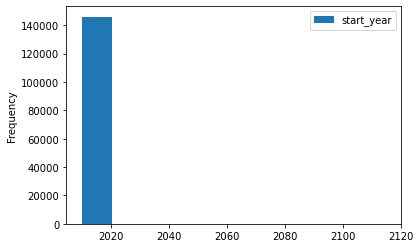

In [37]:
df1.plot.hist();

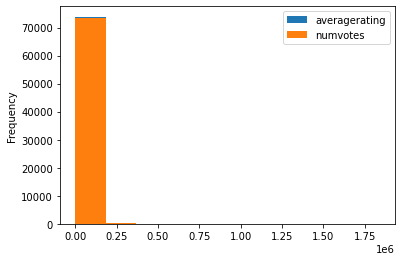

In [38]:
df2.plot.hist();

Conclusions

1. Create movies of the Drama genre as it is of the customer's preference with high ratings.
2. The most successful movies are of the drama genre since they're the most viewed.
3. The highly recommended movies are those of the drama genre based on their ratings.